In [4]:
conda install fastbook


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - fastbook

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [5]:
import fastbook

TypeError: None is not a callable object

In [6]:
fastbook.setup_book()

In [7]:
from fastbook import *

In [8]:
from fastai.vision.widgets import *

In [25]:
key = os.environ.get('AZURE_SEARCH_KEY', '40542b855f9f4876a8f839cc81a1a145')

In [46]:
elephants = search_images_bing(key, 'elephant')
ims = elephants.attrgot('content_url')
len(ims)

150

In [47]:
ims[10]

'http://www.botswana.co.za/images/elephant-jeremy-jowell-1280x881.jpg'

In [49]:
dest = 'images/elephant.jpg'
download_url(ims[10], dest)

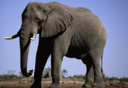

In [50]:
im = Image.open(dest)
im.to_thumb(128,128)

In [51]:
elephant_types = 'indian', 'african'
path = Path('elephants')

In [53]:
if not path.exists():
    path.mkdir()
    for o in elephant_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} elephant')
        download_images(dest, urls=results.attrgot('content_url'))

In [55]:
fns= get_image_files(path)
fns

(#296) [Path('elephants/indian/00000038.jpg'),Path('elephants/indian/00000010.jpg'),Path('elephants/indian/00000005.JPG'),Path('elephants/indian/00000011.jpg'),Path('elephants/indian/00000039.jpg'),Path('elephants/indian/00000007.jpg'),Path('elephants/indian/00000013.jpg'),Path('elephants/indian/00000012.jpg'),Path('elephants/indian/00000006.jpg'),Path('elephants/indian/00000002.jpg')...]

In [56]:
failed = verify_images(fns)
failed

/Users/jamesboyce/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2929: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/Users/jamesboyce/opt/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8192 bytes but only got 0. Skipping tag 700
  warnings.warn(
/Users/jamesboyce/opt/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 68200 bytes but only got 64531. Skipping tag 37500
  warnings.warn(
/Users/jamesboyce/opt/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 264 bytes but only got 0. Skipping tag 37510
  warnings.warn(
/Users/jamesboyce/opt/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skippi

(#5) [Path('elephants/indian/00000020.jpg'),Path('elephants/african/00000107.jpg'),Path('elephants/african/00000073.jpg'),Path('elephants/african/00000105.jpg'),Path('elephants/african/00000046.jpg')]

In [58]:
failed.map(Path.unlink);

In [59]:
elephants = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [60]:
dls = elephants.dataloaders(path)

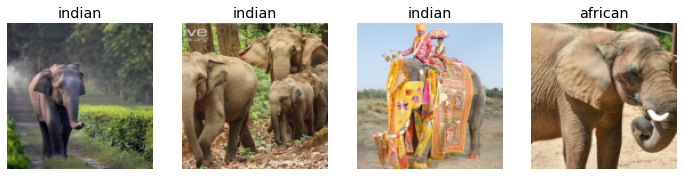

In [64]:
dls.valid.show_batch(max_n=4, nrows=1)

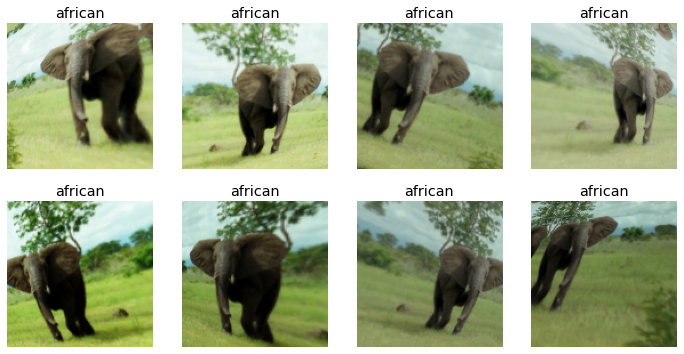

In [65]:
elephants = elephants.new(item_tfms=Resize(128),
batch_tfms=aug_transforms(mult=2))
dls = elephants.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)


In [66]:
elephants = elephants.new(
    item_tfms=RandomResizedCrop(224,min_scale=0.5),
    batch_tfms=aug_transforms())
dls = elephants.dataloaders(path)

In [67]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/jamesboyce/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.151579,1.064467,0.396552,01:54


epoch,train_loss,valid_loss,error_rate,time
0,0.745013,0.935503,0.379310,02:21
1,0.613111,1.097385,0.362069,02:15
2,0.538126,0.823224,0.293103,02:27
3,0.475574,0.715444,0.241379,02:06


In [69]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

RuntimeError: DataLoader worker (pid 16380) is killed by signal: Unknown signal: 0. 

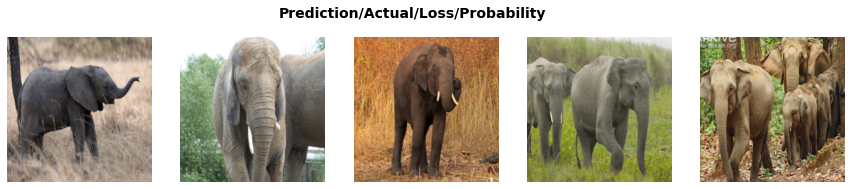

In [70]:
interp.plot_top_losses(5, nrows=1)

In [71]:
cleaner = ImageClassifierCleaner(learn)

RuntimeError: DataLoader worker (pid 16391) is killed by signal: Unknown signal: 0. 

In [72]:
cleaner

NameError: name 'cleaner' is not defined

In [73]:
learn.export()

In [74]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [79]:
learn_inf = load_learner(path/'export.pkl')

In [80]:
learn_inf.predict('images/elephant.jpg')

('african', tensor(0), tensor([9.9993e-01, 7.2231e-05]))

In [81]:
learn_inf.dls.vocab

(#2) ['african','indian']

In [82]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [83]:
btn_upload = SimpleNamespace(data = ['images/elephant.jpg'])

In [84]:
img = PILImage.create(btn_upload.data[-1])

In [86]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [87]:
pred, pred_idx, probs = learn_inf.predict(img)

In [88]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: african; Probability: 0.9999')

In [89]:
btn_run = widgets.Button(description='Classify')

In [91]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    ll_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
        
    btn_run.on_click(on_click_classify)

In [92]:
btn_upload = widgets.FileUpload()

In [93]:
VBox([widgets.Label('Select your elephant!'),
     btn_upload, btn_run, out_pl, lbl_pred])

In [95]:
!pip install voila
!jupyter serverextension enable voila -sys-prefix

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [96]:
!pip install jovian --upgrade -q

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [97]:
import jovian

<IPython.core.display.Javascript object>

In [98]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/jwlboyce/elephant-recognition


'https://jovian.ml/jwlboyce/elephant-recognition'